# Used Car Analysis

## Data Import

For this project, I will be importing a dataset I obtained from the website kaggle, https://www.kaggle.com/datasets/chancev/carsforsale,
that was scraped from an unnamed online auto marketplace, with listing information for many different vehicles of varying makes, models, and model years.  I will import it from a csv using the pandas package, and then start exploring, cleaning, visualizing, and analyzing the data.   

In [196]:
#Import needed modules and dataset(s) to be used
#Dataset acquired from: https://www.kaggle.com/datasets/chancev/carsforsale 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import datetime

pd.set_option('display.max.columns', None)
cars_data = pd.read_csv('cars_raw.csv')

In [197]:
#Take a first look at dataframe
cars_data.head(5)

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,ExteriorColor,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,Red,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,Shadow Black,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,Granite Crystal Clearcoat Metallic,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,NaN,4.9,5.0,4.9,5.0,5.0,5.0,Gray,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,Eminent White Pearl,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [198]:
#Further Explore dataset
print(cars_data.describe(), end = '\n --- \n')
print(cars_data.isna().sum(), end = '\n --- \n')
print(cars_data['DealType'].value_counts(), end = '\n --- \n')
print(cars_data['Make'].value_counts())
print(cars_data['State'].value_counts())
print(cars_data.info())

              Year  ConsumerRating  ConsumerReviews  SellerRating  \
count  9379.000000     9379.000000      9379.000000   9379.000000   
mean   2018.721719        4.702825       133.187014      4.412571   
std       2.221708        0.240795       154.985640      0.626258   
min    2001.000000        2.500000         1.000000      1.000000   
25%    2018.000000        4.700000        30.000000      4.300000   
50%    2019.000000        4.800000        75.000000      4.600000   
75%    2020.000000        4.800000       182.000000      4.800000   
max    2022.000000        5.000000       817.000000      5.000000   

       SellerReviews  ComfortRating  InteriorDesignRating  PerformanceRating  \
count    9379.000000    9379.000000           9379.000000        9379.000000   
mean      984.089988       4.771895              4.727391           4.696290   
std      1609.039864       0.217822              0.194391           0.253664   
min         1.000000       3.000000              2.800000 

The dataset has been imported into a pandas dataframe, but after looking it over the data is a bit messy.  Major issues include price not being imported as a float because of the dollar sign and comma in each value, along with some missing values, and there also being a lot of categories that can be condensed for easier analysis. 

## Data Cleaning

In [199]:
#Reclassify missing values in DeatlType column
print(cars_data[cars_data['DealType'].isna()]['DealType'])
cars_data['DealType'].fillna('No Data Available', inplace = True)
print(cars_data['DealType'].value_counts())

3       NaN
14      NaN
17      NaN
21      NaN
22      NaN
       ... 
8913    NaN
9138    NaN
9171    NaN
9194    NaN
9305    NaN
Name: DealType, Length: 222, dtype: object
Good                 5524
Great                2408
Fair                 1225
No Data Available     222
Name: DealType, dtype: int64


In [200]:
#Drop $ ,(,), and 'Not Priced' to make price into an int column
price_na_list = cars_data[cars_data['Price'].eq('Not Priced')].index.tolist()
cars_data.drop(labels = price_na_list, inplace = True)
cars_data['Price'] = cars_data['Price'].str.replace('$', '', regex = False).str.replace(',', '', regex = False)
cars_data['Price'] = pd.to_numeric(cars_data['Price'])
print(cars_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9374 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9374 non-null   int64  
 1   Make                   9374 non-null   object 
 2   Model                  9374 non-null   object 
 3   Used/New               9374 non-null   object 
 4   Price                  9374 non-null   int64  
 5   ConsumerRating         9374 non-null   float64
 6   ConsumerReviews        9374 non-null   int64  
 7   SellerType             9374 non-null   object 
 8   SellerName             9374 non-null   object 
 9   SellerRating           9374 non-null   float64
 10  SellerReviews          9374 non-null   int64  
 11  StreetName             9374 non-null   object 
 12  State                  9374 non-null   object 
 13  Zipcode                9374 non-null   object 
 14  DealType               9374 non-null   object 
 15  Comf

In [201]:
#Fix state abbr. column
cars_data['State'] = cars_data['State'].str.replace('Michigan', 'MI', regex = False).str.replace('AZ-101', 'AZ', regex = False)
print(cars_data['State'].value_counts())
misfit_list = ['Bldg', 'Suite', 'US-12', 'Glens', 'SE', 'US-169']
misfit_index_list = cars_data[cars_data['State'].isin(misfit_list)].index.tolist()
cars_data.drop(labels = misfit_index_list, inplace = True)
print(cars_data['State'].value_counts())

TX        1225
FL         888
CA         668
IL         593
NY         439
GA         392
AZ         346
VA         338
NJ         337
OH         328
MD         323
MA         320
PA         282
MI         270
NC         228
MN         228
IN         183
MO         170
TN         166
WA         165
SC         163
CO         158
WI         127
CT          99
NV          93
KS          81
NH          80
KY          79
UT          73
AL          72
LA          51
OK          45
AR          41
OR          37
NE          37
IA          35
RI          35
ID          28
SD          23
MS          23
HI          16
ND          14
DE          13
WV          13
RT          13
ME           8
VT           7
NM           5
MT           4
WY           3
Bldg         2
Suite        2
US-12        1
Glens        1
SE           1
AK           1
US-169       1
Name: State, dtype: int64
TX    1225
FL     888
CA     668
IL     593
NY     439
GA     392
AZ     346
VA     338
NJ     337
OH     328
MD     32

In [202]:
#Simplify Used/New column categories
print(cars_data['Used/New'].unique(), end = '\n --- \n')
cars_data['Used/New'] = cars_data['Used/New'].apply(lambda x: 'Certified' if 'Certified' in x else x)
print(cars_data['Used/New'].unique())

['Used' 'Dodge Certified' 'Acura Certified' 'Honda Certified'
 'Mercedes-Benz Certified' 'Ford Certified' 'Toyota Certified'
 'BMW Certified' 'Porsche Certified' 'Cadillac Certified'
 'Volvo Certified' 'Nissan Certified' 'Subaru Certified'
 'Volkswagen Certified' 'INFINITI Certified' 'Chevrolet Certified'
 'Kia Certified' 'RAM Certified' 'Jeep Certified' 'GMC Certified'
 'Buick Certified' 'Alfa Romeo Certified' 'Bentley Certified'
 'MINI Certified' 'Ferrari Certified' 'Maserati Certified']
 --- 
['Used' 'Certified']


In [203]:
#Simplify FuelType column to a few categories
print(cars_data['FuelType'].unique())

def fuel_classer(x):
    if x == 'Gasoline' or x == 'Gasoline Fuel':
        return 'Gasoline'
    if x == 'Electric Fuel System' or x == 'Electric':
        return 'Electric'
    if x == 'Flexible Fuel' or x == 'E85 Flex Fuel':
        return 'Flex'
    else:
        return 'Hybrid'

cars_data['FuelType'] = cars_data['FuelType'].apply(fuel_classer)
print(cars_data['FuelType'].unique())

['Gasoline' 'Gasoline Fuel' 'Electric Fuel System' 'E85 Flex Fuel'
 'Electric' 'Hybrid' 'Plug-In Electric/Gas' '–' 'Flex Fuel Capability'
 'Diesel' 'Diesel Fuel' 'Gasoline/Mild Electric Hybrid' 'Flexible Fuel']
['Gasoline' 'Electric' 'Flex' 'Hybrid']


In [204]:
#Simplify Drivetrain column
print(cars_data['Drivetrain'].unique())
cars_data.drop(cars_data[cars_data['Drivetrain'] == '–'].index.tolist(), inplace = True)

def drivetrain_classer(x):
    if x == 'Front-wheel Drive' or x == 'Front Wheel Drive' or x == 'FWD':
        return 'FWD'
    if x == 'Rear-wheel Drive' or x == 'RWD':
        return 'RWD'
    if x == 'All-wheel Drive' or x == 'AWD':
        return 'AWD'
    if x == 'Four-wheel Drive' or x == '4WD':
        return '4WD'

cars_data['Drivetrain'] = cars_data['Drivetrain'].apply(drivetrain_classer)
print(cars_data['Drivetrain'].unique())

['Front-wheel Drive' 'Four-wheel Drive' 'Rear-wheel Drive'
 'All-wheel Drive' '4WD' 'AWD' 'RWD' 'FWD' 'Front Wheel Drive' '–']
['FWD' '4WD' 'RWD' 'AWD']


In [205]:
#Simplify Transmission column

print(cars_data['Transmission'].unique(), end = '\n --- \n')
cars_data.drop(cars_data[cars_data['Transmission'] == '-'].index, inplace = True)

def trans_classer(x):
    if 'AUTOMATIC' in x or 'Automatic' in x or 'automatic' in x or 'CVT' in x or 'cvt' in x or 'variable' in x or 'Auto' in x or 'auto' in x or 'A/T' in x:
        return 'Automatic'
    if 'M/T' in x or 'manual' in x or 'Manual' in x or 'Dual Shift' in x or 'Double-clutch' in x or 'PDK' in x:
        return 'Manual'
    else:
        return 'Automatic'

cars_data['Transmission'] = cars_data['Transmission'].apply(trans_classer)
print(cars_data['Transmission'].unique())

['8-Speed Automatic' '10-Speed Automatic' 'Automatic CVT'
 '5-Speed Automatic' '7-Speed Automatic' '9-Speed Automatic'
 '6-Speed Automatic' 'Automatic' '6-Speed A/T'
 '7-Speed Automatic with Auto-Shift' 'Transmission w/Dual Shift Mode'
 '7-Speed A/T' 'A/T' '8-SPEED A/T' '8-Speed Automatic with Auto-Shift'
 '8-Speed A/T' '1-Speed A/T' '9-SPEED A/T'
 'driver adaptive 7 speed automatic' '6-SPEED A/T' '5-SPEED M/T'
 '4-Speed Automatic' '6-Speed M/T' '8 speed tiptronic s automatic'
 '1-Speed Automatic' 'Automatic with Overdrive' 'CVT 7-Speed'
 'Automatic 5-Speed' '9-Speed A/T' '–' 'CVT' 'Variable' 'sport automatic'
 'Manual' '6-Speed Automatic with Auto-Shift' '6-Speed Manual'
 '5-SPEED A/T' '6-Speed Automatic with Overdrive' '7-SPEED A/T'
 '9g tronic automatic' '5-Speed Manual' 'Automatic 6-Speed'
 '1 speed automatic' 'CVT Lineartronic' '10-Speed A/T' 'CVT 6-Speed'
 'Automatic with Tiptronic' '8 speed automatic w/sportmatic' 'A'
 'AUTOMATIC' '7-Speed' '9 speed automatic' 'automatic' '10-SP

In [206]:
#Remove personal information/less useful columns
cars_data.drop(['InteriorColor', 'ExteriorColor', 'SellerName', 'VIN', 'Stock#'], inplace = True, axis = 1)
cars_data

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerRating,SellerReviews,StreetName,State,Zipcode,DealType,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,3.3,3,25560 Madison Ave Murrieta,CA,92562,Great,4.7,4.6,4.6,4.4,4.6,4.7,FWD,19,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,4.8,131,1001 S Ben Maddox Way Visalia,CA,93292,Good,4.9,4.8,4.8,4.6,4.8,4.7,4WD,19,24,Gasoline,Automatic,3.5L V6 24V PDI DOHC Twin Turbo,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,4.6,249,1100 S Madera Ave Madera,CA,93637,Good,4.8,4.7,4.8,4.6,4.8,4.7,4WD,15,21,Gasoline,Automatic,5.7L V8 16V MPFI OHV,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,4.6,284,2121 E Sahara Ave Las Vegas,NV,89104,No Data Available,4.9,5.0,4.9,5.0,5.0,5.0,FWD,29,35,Gasoline,Automatic,1.5L I4 16V GDI DOHC Turbo,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,4.8,4755,7737 Eastgate Rd Henderson,NV,89011,Good,4.9,4.8,4.8,4.7,4.8,4.9,FWD,20,27,Gasoline,Automatic,3.5L V6 24V PDI DOHC,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,4.4,443,657 Riverdale St. West Springfield,MA,01089,Good,4.7,4.7,4.6,4.7,4.8,4.8,AWD,27,33,Gasoline,Automatic,2.0L H4 16V GDI DOHC,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,4.8,1789,88 Turnpike Road Westboro,MA,01581,Fair,4.9,4.8,4.8,4.6,5.0,4.9,AWD,17,22,Hybrid,Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,4.7,831,147 Daniel Webster Hwy Nashua,NH,03060,Good,4.9,4.8,4.7,4.6,4.9,4.8,AWD,15,22,Gasoline,Automatic,3.6L V6 24V GDI DOHC,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,4.4,680,97 Andover St Danvers,MA,01923,Good,4.8,4.7,4.6,4.7,4.7,4.8,AWD,26,33,Gasoline,Automatic,2.5L H4 16V GDI DOHC,30760


The data now appears to be in a pretty workable format, and visualizations/tests can now be conducted on it to start gleaning some trends and information. 

## Data Visualization

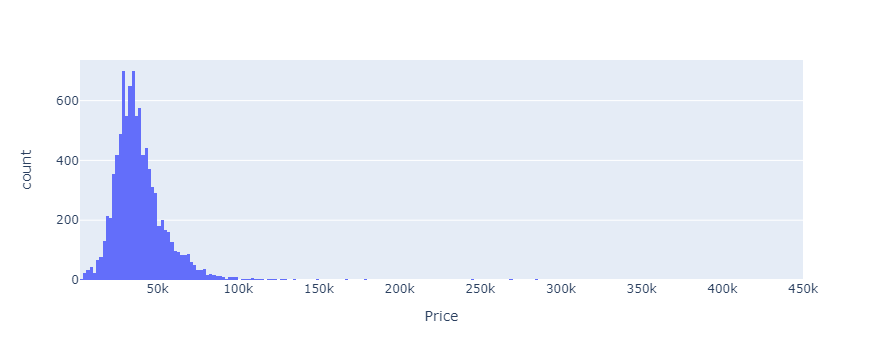

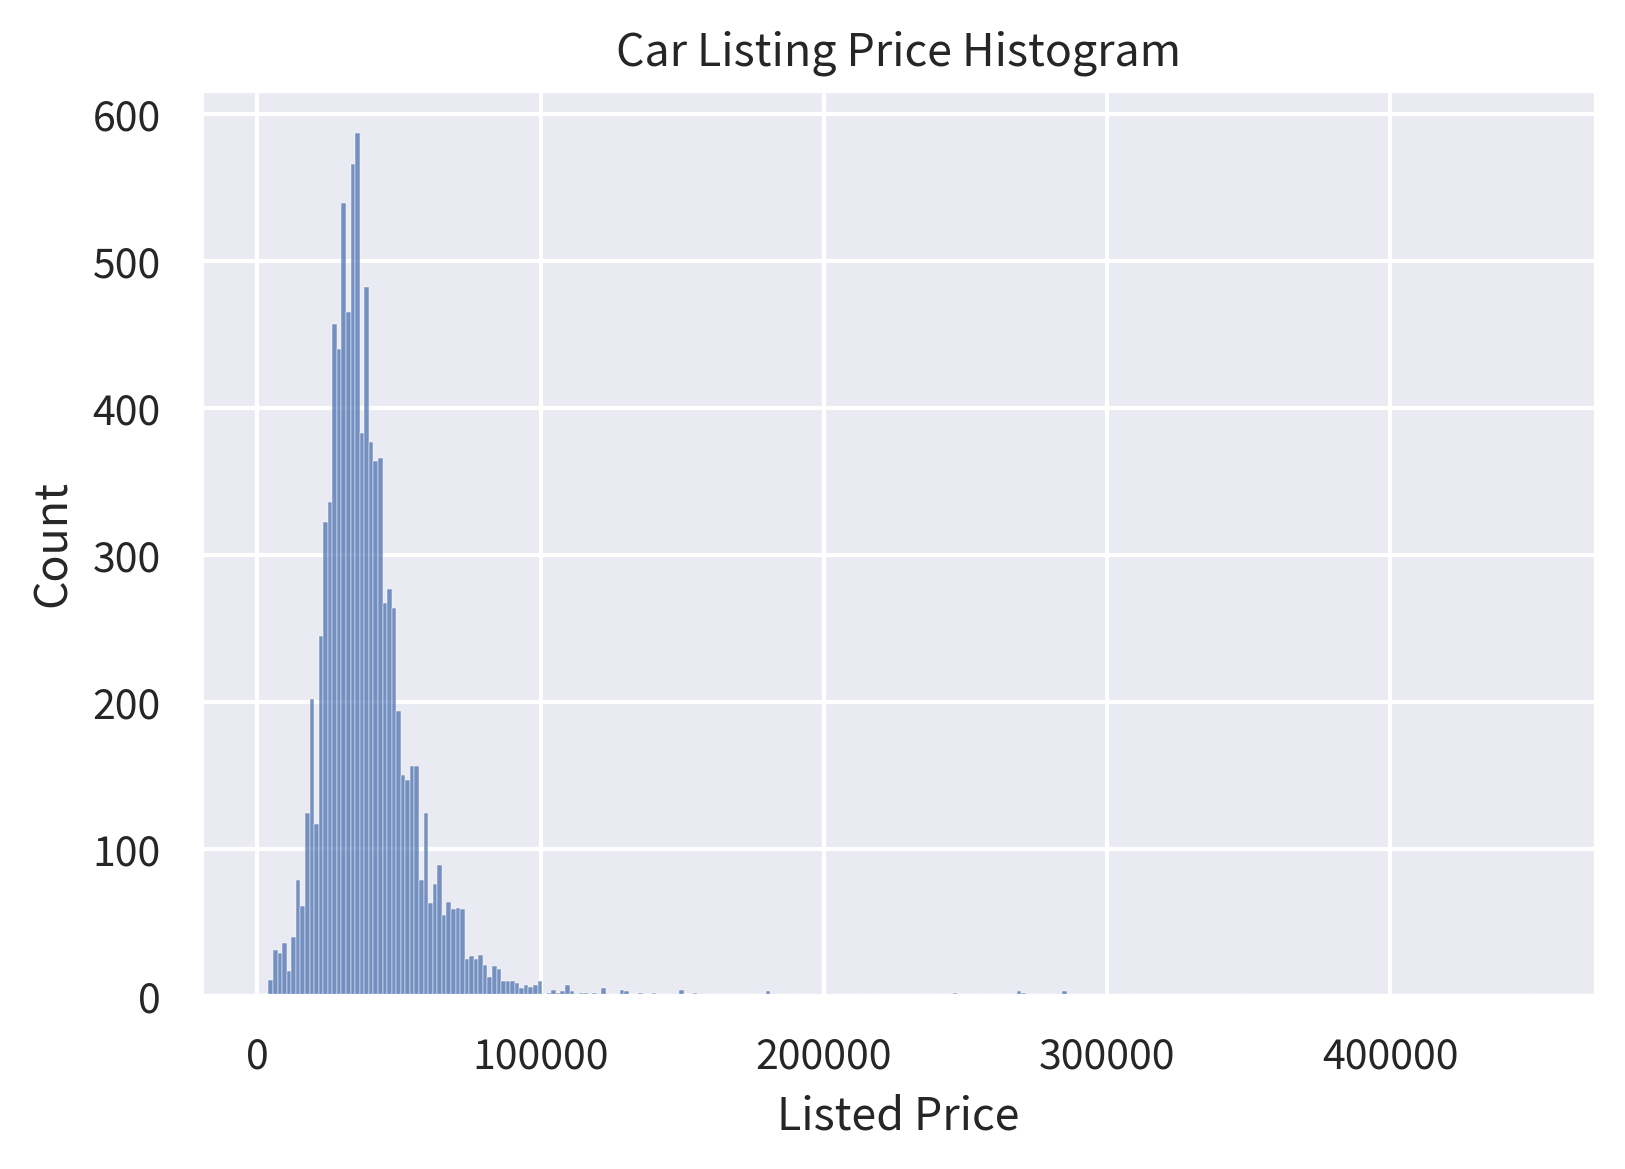

<Figure size 1800x1200 with 0 Axes>

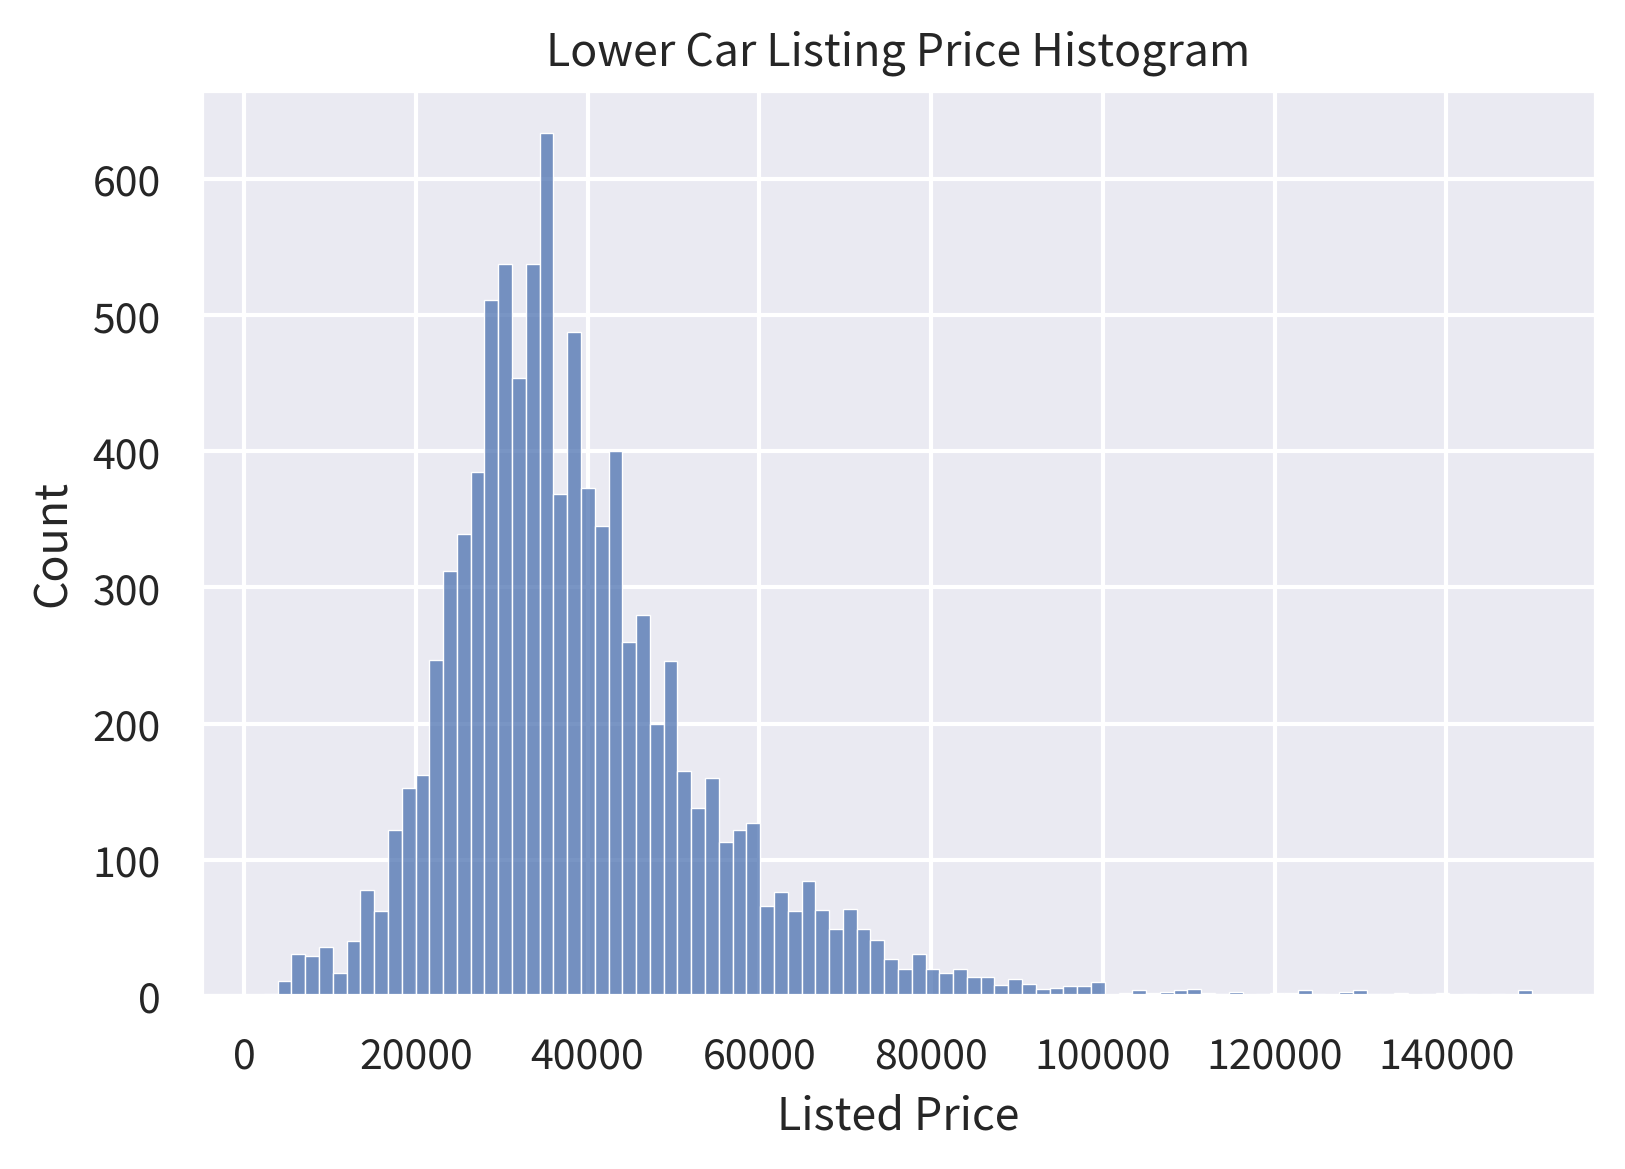

Car Price Figures
count      9359.000000
mean      39783.180895
std       20409.419134
min        2300.000000
25%       28994.000000
50%       35999.000000
75%       45995.500000
max      449996.000000
Name: Price, dtype: float64


In [225]:
# Make a histogram of all the car prices to get an idea of the price distribution

#Make a histogram with plotly express first
fig = px.histogram(cars_data, x = 'Price')
fig.show()

#Make a histogram using seaborn
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Source Sans Pro'
fig2, ax = plt.subplots()
ax = sns.set_palette('deep')
ax = sns.histplot(data = cars_data, x = 'Price')
ax.set_title('Car Listing Price Histogram')
ax.set_xlabel('Listed Price')
plt.show()

#The data appears heavily skewed right, so I make another histogram with prices under $150K
lower_cars_data = cars_data[cars_data['Price'] < 150000]
plt.clf()
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Source Sans Pro'
fig2, ax = plt.subplots()
ax = sns.set_palette('deep')
ax = sns.histplot(data = lower_cars_data, x = 'Price') 
ax.set_title('Lower Car Listing Price Histogram')
ax.set_xlabel('Listed Price')
plt.show()

#Give price statistics
print('Car Price Figures')
print(cars_data['Price'].describe())

The second histogram, taking out the highest of the outlier prices, gives us a good idea to the spread of car prices.  We can see that prices are the most densely concentrated between 30,000 - $40,000, which looking at the stats confirms.  The mean is perhaps on the higher end, but this would make sense given the right skewed nature of car prices.

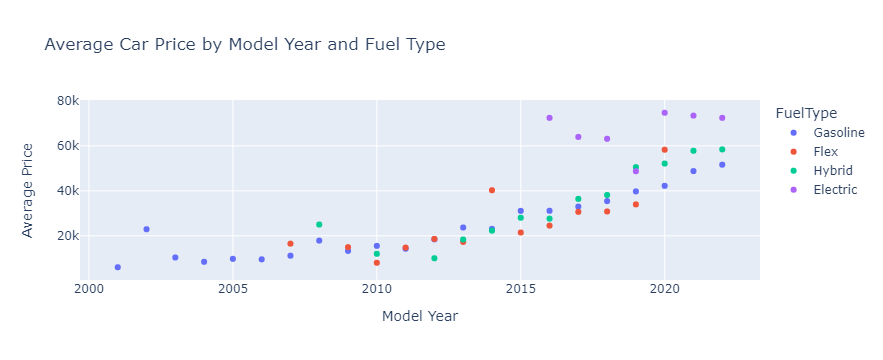

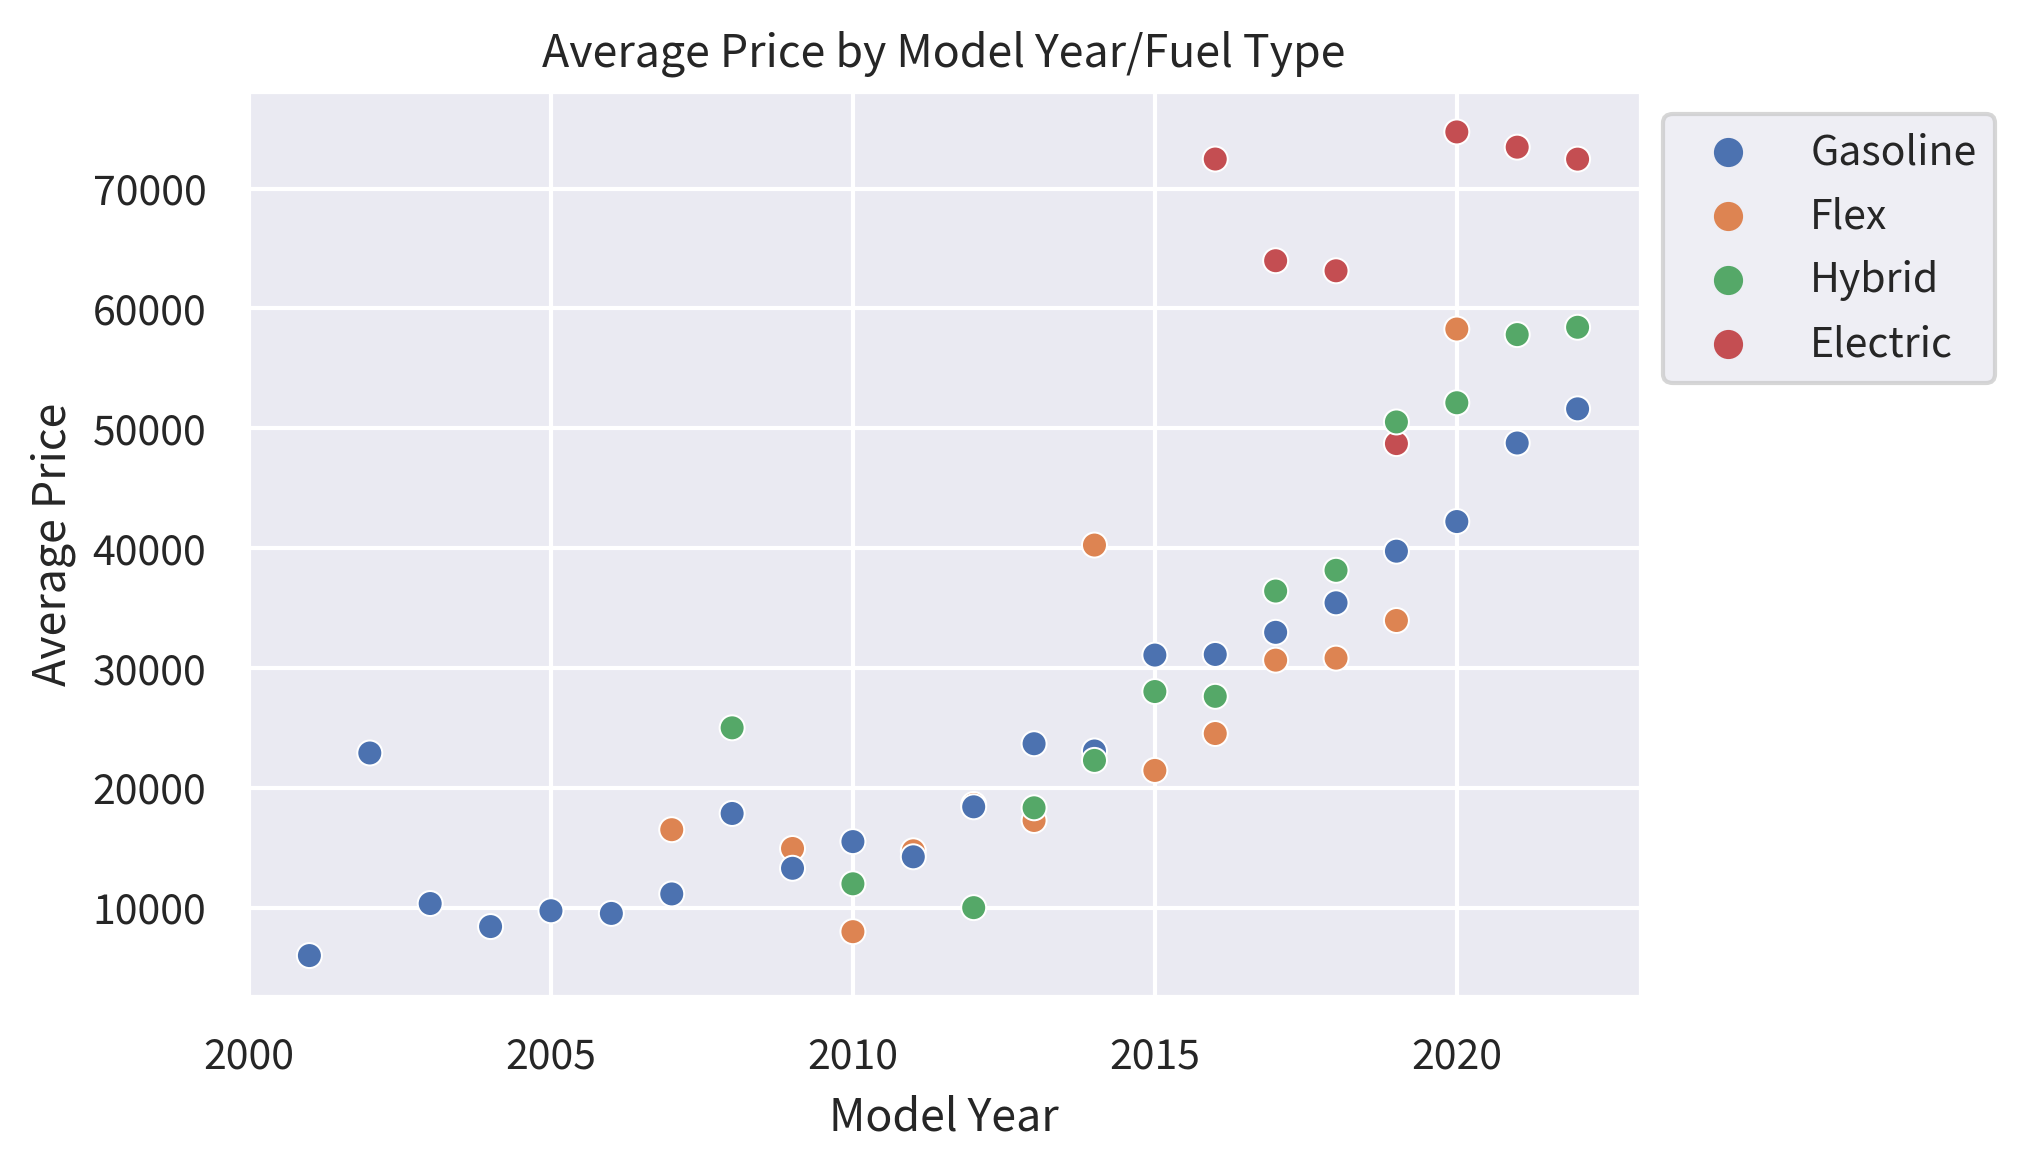

In [220]:
#Start producing graphs based on interesting metrics, first one model year/fueltype and price as an example

#Make a new df with aggregated price, grouped by year and fueltype
year_price = cars_data.groupby(['Year', 'FuelType']).mean('Price').reset_index()


#Make a chart with plotly express (won't show up in github)
fig = px.scatter(year_price, x = 'Year', y = 'Price', color = 'FuelType', title = 'Average Car Price by Model Year and Fuel Type',
                 labels = {'Year' : 'Model Year', 'Price' : 'Average Price'})
fig.show()

#Next with seaborn, which will show up on github page natively
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Source Sans Pro'
fig2, ax = plt.subplots()
ax = sns.set_palette('deep')
ax = sns.scatterplot(data = year_price, x = 'Year', y = 'Price', hue = 'FuelType')
ax.set_title('Average Price by Model Year/Fuel Type')
ax.set_xlabel('Model Year')
ax.set_ylabel('Average Price')
ax.legend(loc='upper right', bbox_to_anchor=(1.27, 1))
plt.show()


From this scatterplot, we can see that there seems to be an overall upward trend in price when moving towards newer model years, which makes sense.  We can also see that for listings featuring cars made in the last 6 or so years, hybrids and electric cars tend to be more expensive on average than gasoline/flex vehicles.

   Drivetrain  Year  car_count     avg_price
9         4WD  2013         11  23800.454545
10        4WD  2014         20  25738.250000
11        4WD  2015         55  31436.763636
12        4WD  2016         51  36134.000000
13        4WD  2017         96  36968.562500
14        4WD  2018        182  41448.692308
15        4WD  2019        453  44682.891832
16        4WD  2020        358  48882.829609
17        4WD  2021        290  61662.762069
29        AWD  2013         39  26619.794872
30        AWD  2014         50  30017.900000
31        AWD  2015         70  38764.357143
32        AWD  2016        167  32162.083832
33        AWD  2017        259  35253.996139
34        AWD  2018        514  37350.865759
35        AWD  2019       1872  41803.134615
36        AWD  2020        867  48960.389850
37        AWD  2021        558  51439.164875
38        AWD  2022         43  58461.348837
48        FWD  2013         40  15870.275000
49        FWD  2014         38  16470.815789
50        

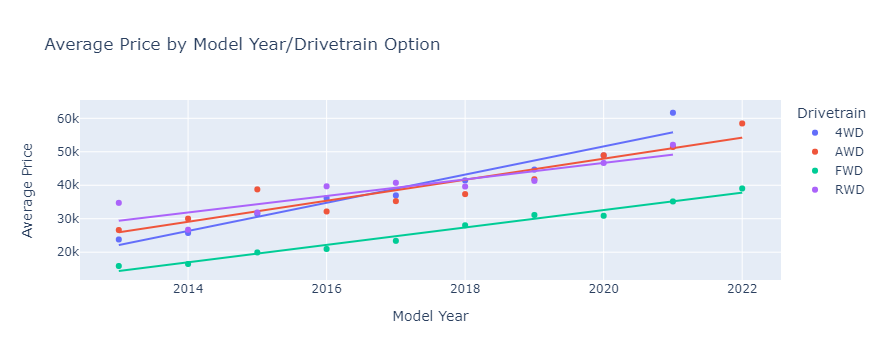

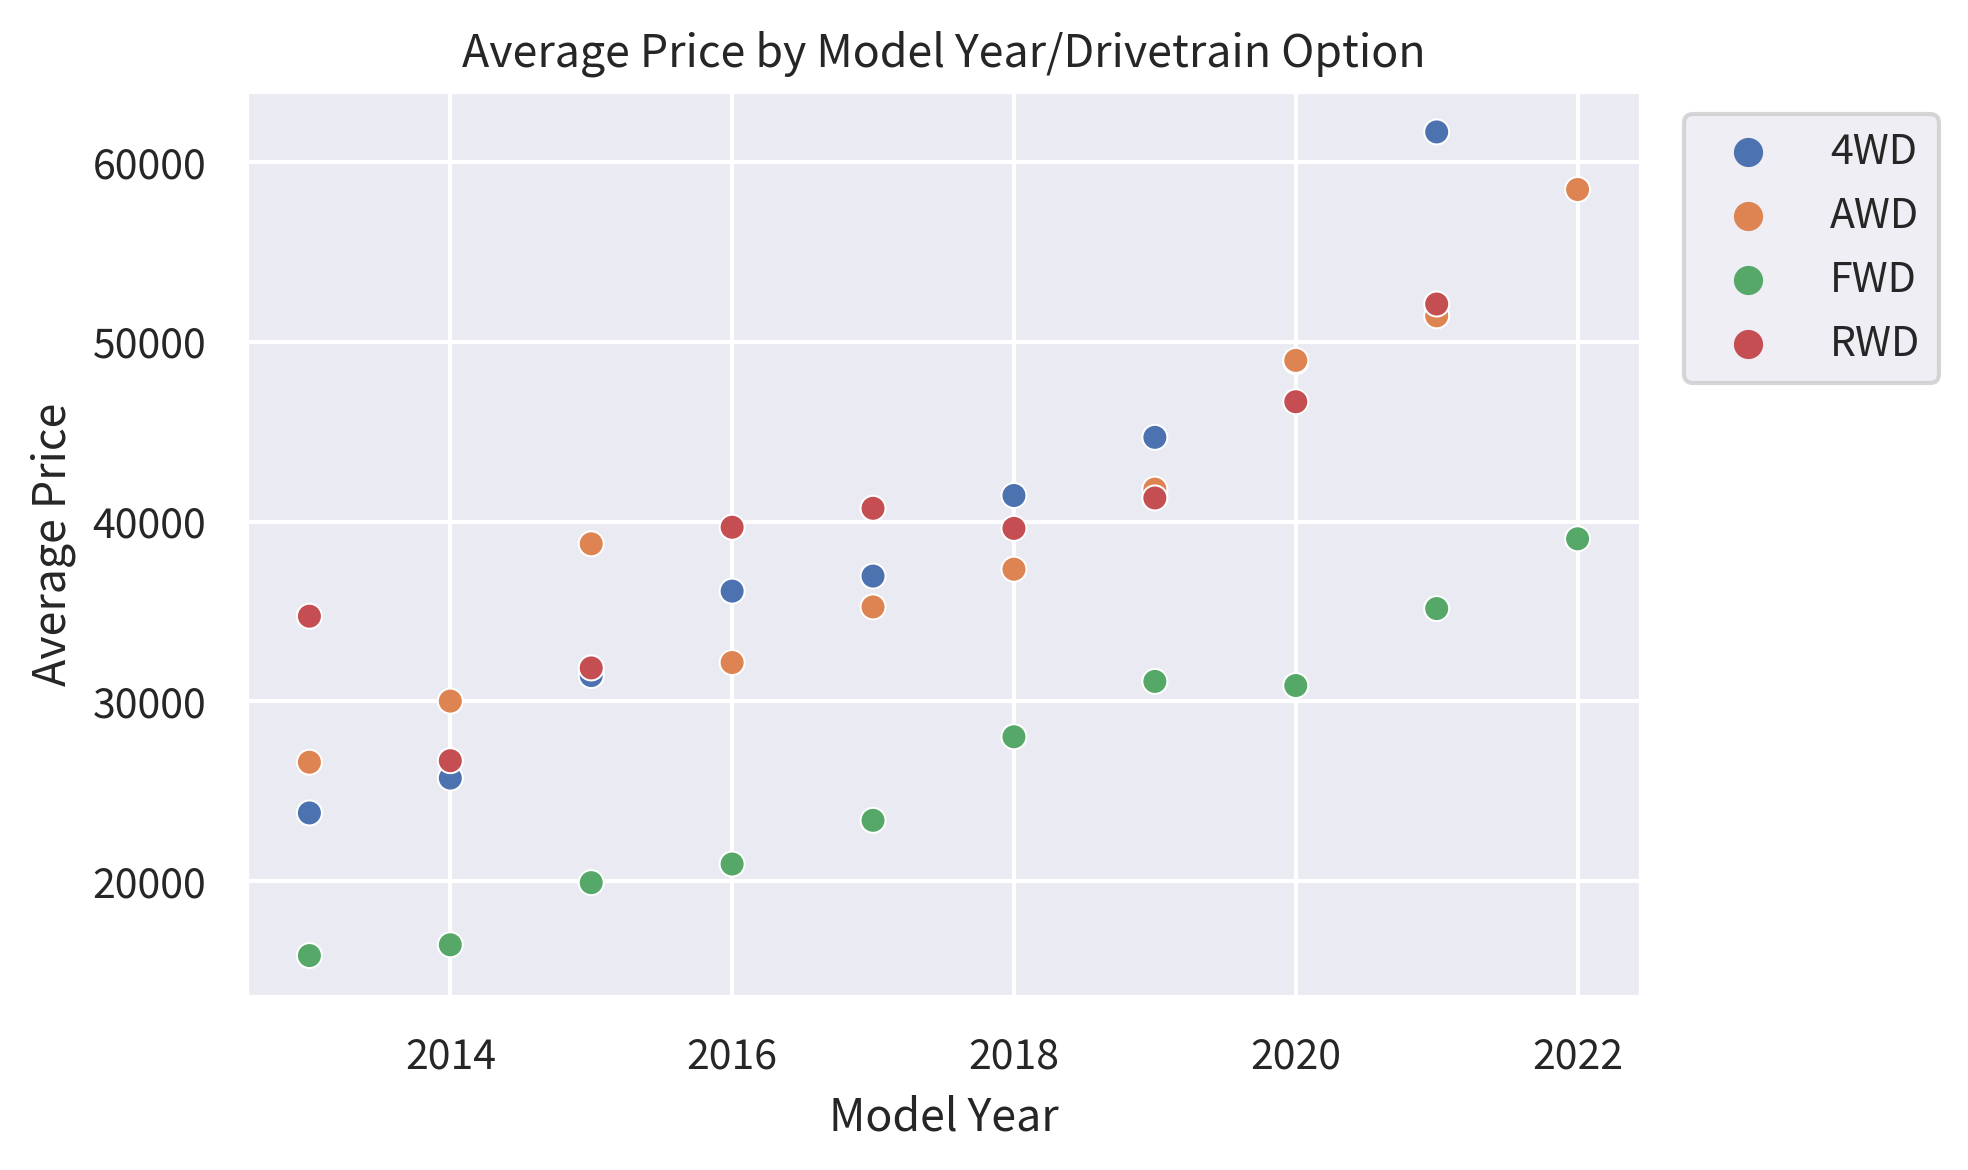

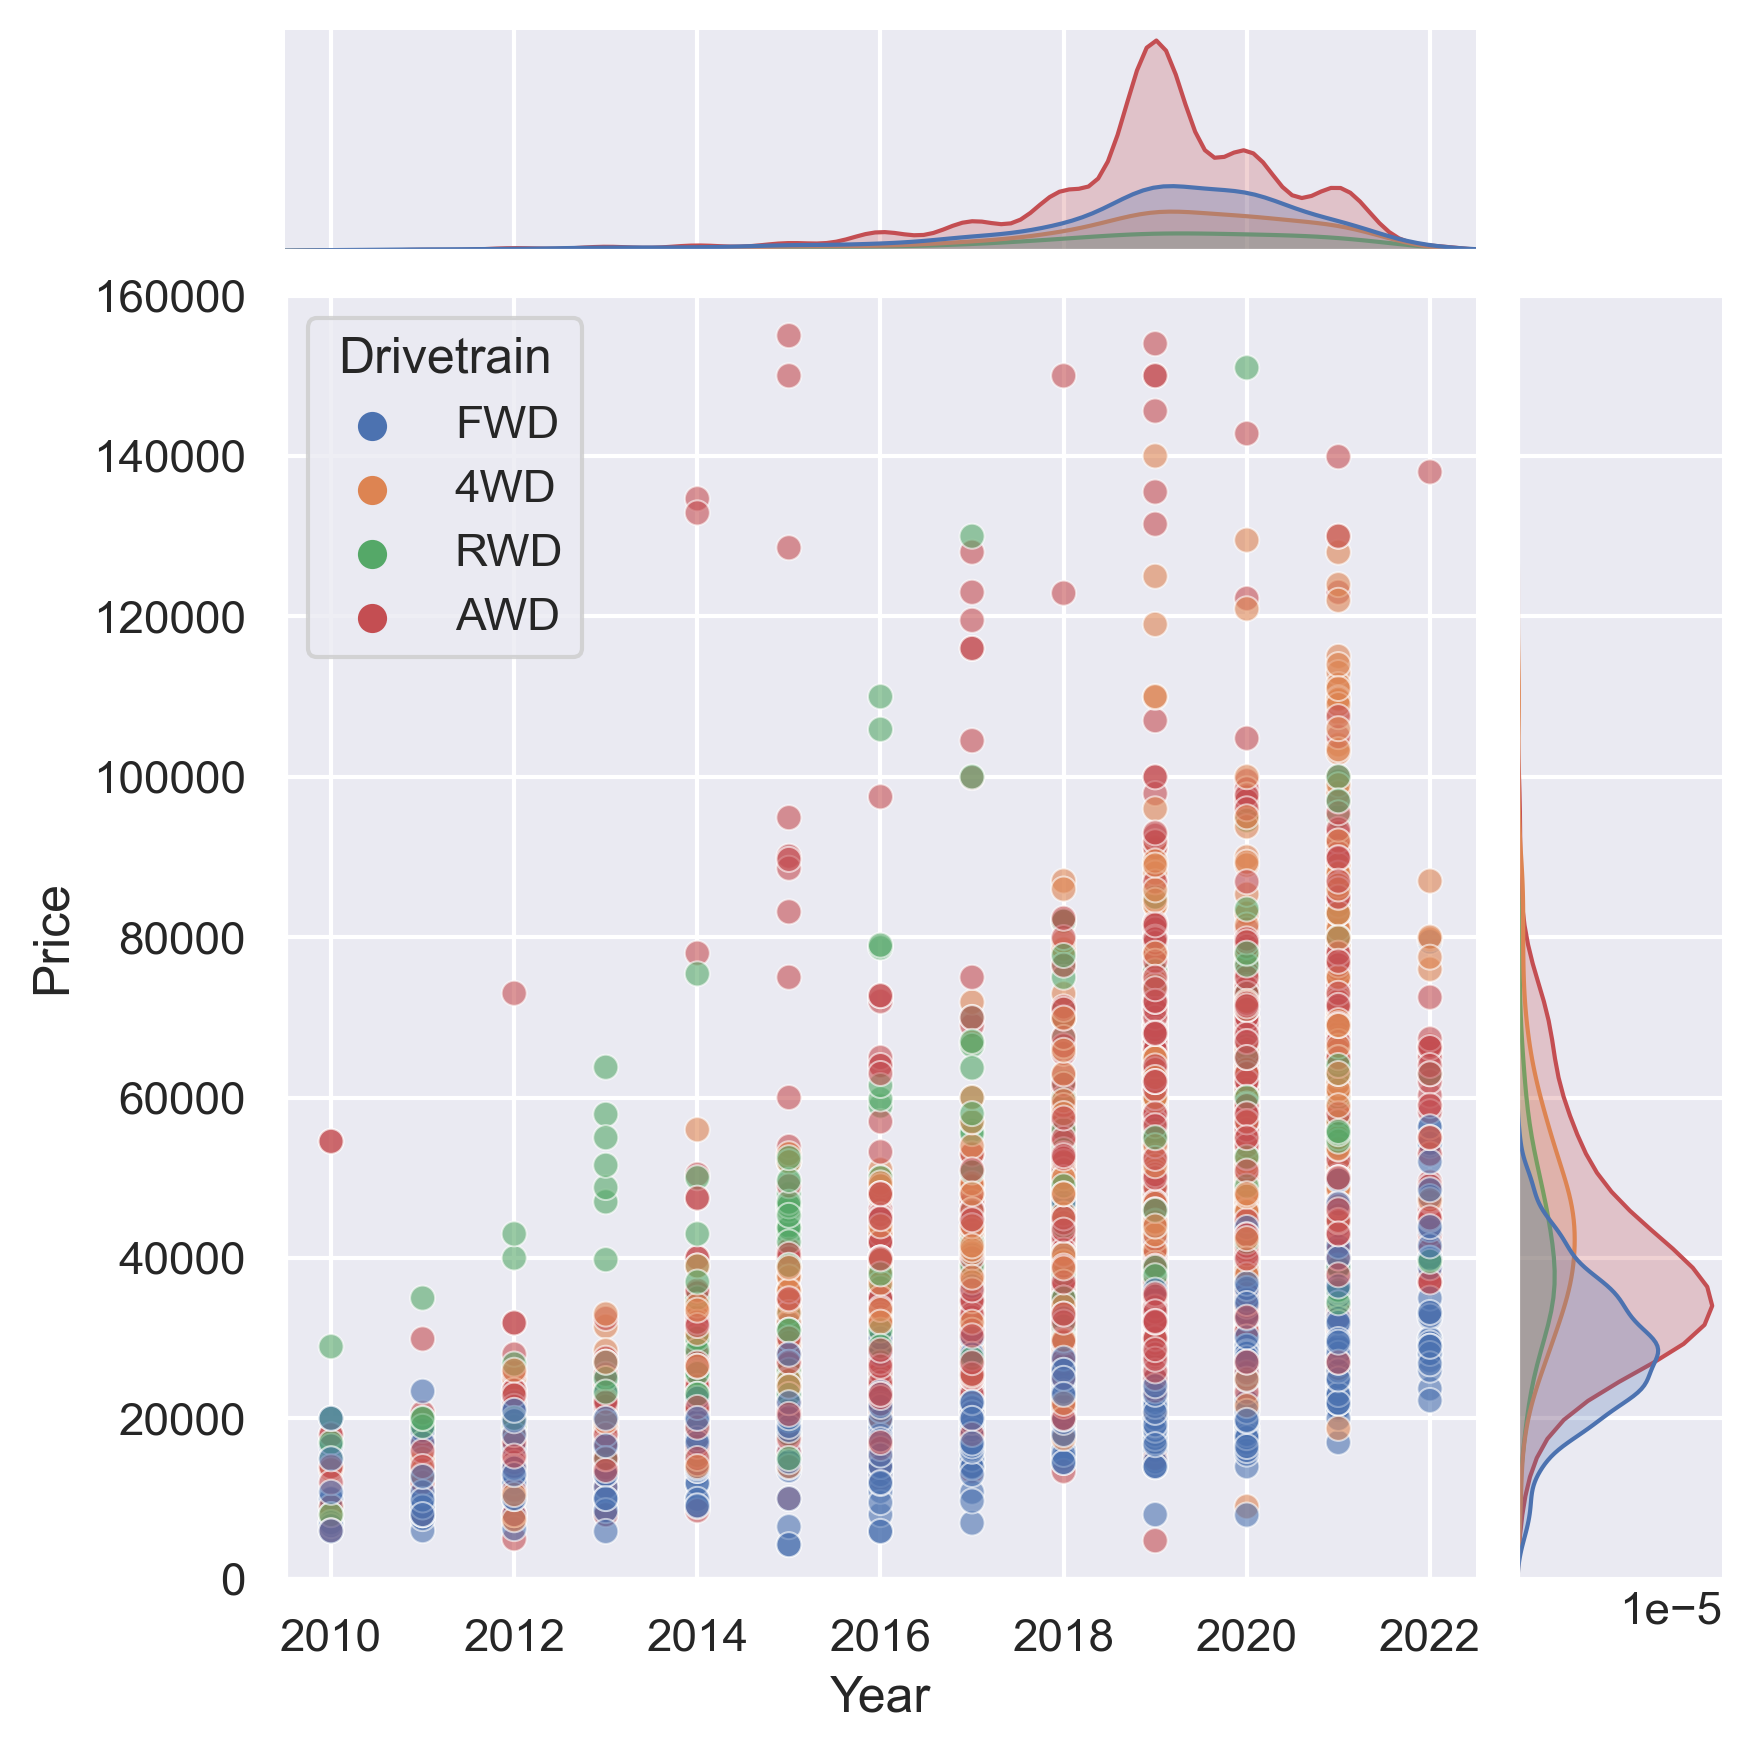

In [239]:
#Make a new df, to compare ratings between different drivetrains over model years
drive_df = cars_data.groupby(['Drivetrain', 'Year']).agg(car_count = ('SellerRating', 'count'),
                                                  avg_price = ('Price', 'mean')).reset_index()                                            
drive_df = drive_df[(drive_df['Year'] > 2012) & (drive_df['car_count'] > 10)]
drive_df_years = drive_df['Year'].unique
print(drive_df)

#Graph average price by model year and drivetrain option, using plotly express
fig = px.scatter(drive_df, x = 'Year', y = 'avg_price', color = 'Drivetrain', trendline = 'ols',
           labels = {'Year' : 'Model Year', 'avg_price' : 'Average Price'}, title = 'Average Price by Model Year/Drivetrain Option')
fig.show()

#Make a similar graph, instead using seaborn
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Source Sans Pro'
fig2, ax = plt.subplots()
ax = sns.set_palette('deep')

ax = sns.scatterplot(data = drive_df, x = 'Year', y = 'avg_price', hue = 'Drivetrain')
ax.set_title('Average Price by Model Year/Drivetrain Option')
ax.set_xlabel('Model Year')
ax.set_ylabel('Average Price')
ax.legend(loc='upper right', bbox_to_anchor=(1.23, 1))
plt.show()

#Make a jointplot, showing different distributions
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Source Sans Pro'
ax = sns.set_palette('deep')
sns.set_theme(style="darkgrid")
ax = sns.jointplot(data = cars_data, x = 'Year', y = 'Price', 
                   hue = 'Drivetrain', alpha = .6, xlim = (2009.5, 2022.5), ylim = (0, 160000))
plt.show()
    

We can draw similar conclusions from this plot as the last, as it does appear that the average price of newer cars tends to be higher.  We can also see that front wheel drive cars on average tend to not be as expensive as four wheel drive, all wheel drive, or rear wheel drive.  This logically checks out because trucks/SUVS which typically have these options tend to be more expensive.  The jointplot below gives a similar view, while also giving distrubtion information for each drivetrain type, both for price and model years.

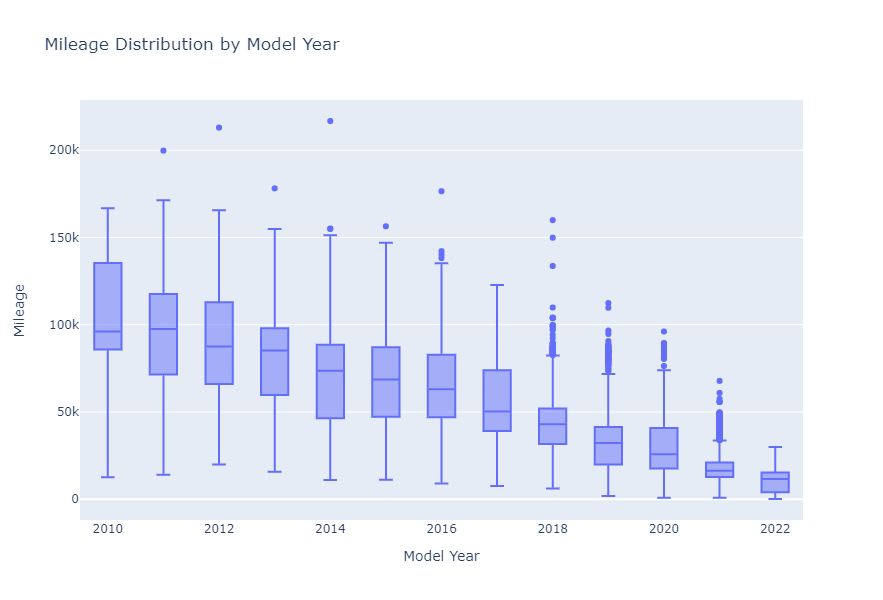

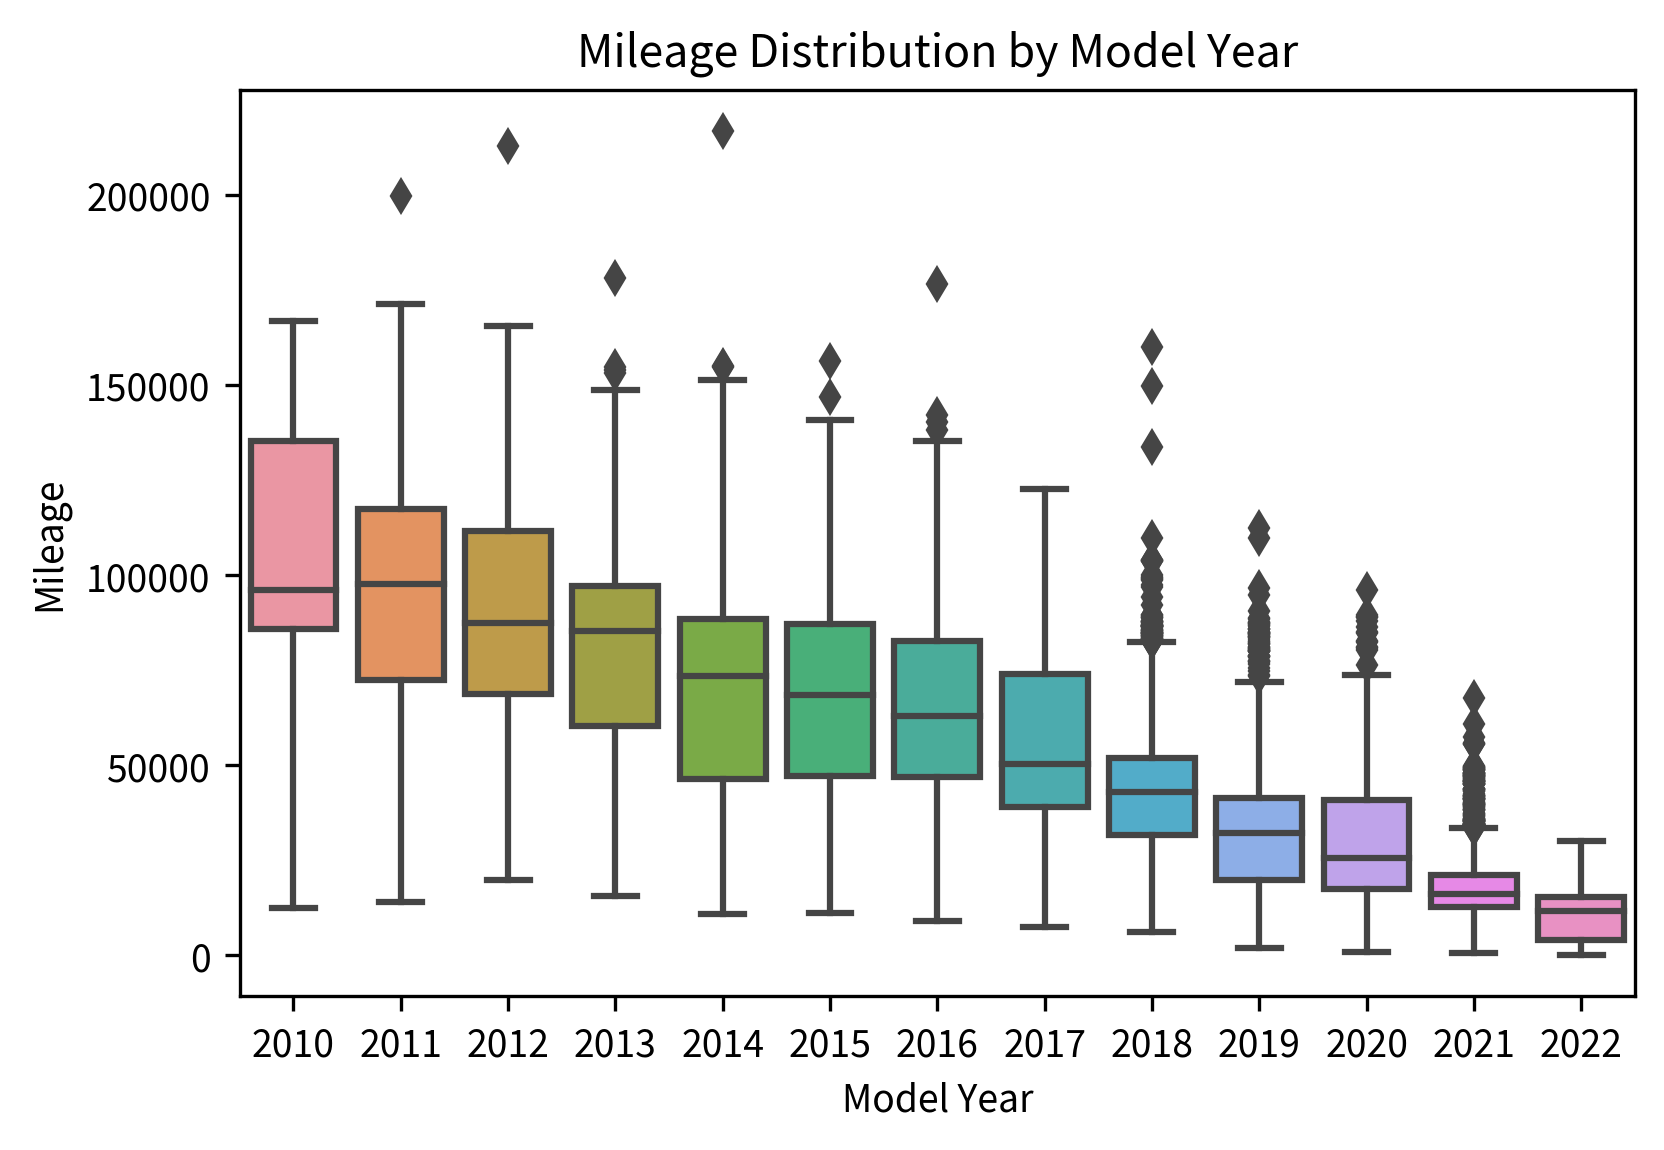

In [210]:
#Make mileage boxplots by model year, in both plotly and seaborn/matplotlib 

#Make plot in plotly express
fig = px.box(cars_data[cars_data['Year'] > 2009], x = 'Year', y = 'Mileage',
             
             labels = {'Year' : 'Model Year'}, 
             title = 'Mileage Distribution by Model Year',
            height = 600)
fig.show()

#Make similar plot in seaborn/matplotlib

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'Source Sans Pro'
fig2, ax = plt.subplots()
ax = sns.set_palette('deep')

ax = sns.boxplot(data = cars_data[cars_data['Year'] > 2009], x = 'Year', y = 'Mileage')
ax.set_title('Mileage Distribution by Model Year')
ax.set_xlabel('Model Year')
plt.show()

As we can see here, generally newer modoel year cars have fewer miles on them, which makes sense.  The range of mileage on older vehicles is wider as well, as some have been driven a lot over the years and others appear to not been driven much at all

In [211]:
#Statistical tests to see if there are significant differences between means and such

In [212]:
#Make a regression, to try to predict price based on different numeric characteristics

In [213]:
#Use a naive Bayes classification to predict make based on ratings